In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import InputLayer, Dense, Dropout

from keras.initializers import RandomUniform, RandomNormal, TruncatedNormal, GlorotNormal, GlorotUniform

### Hyperparameters:- 
* **1. No Of hidden Layers**
* **2. No Of Neruron**
* **3. Activation Function**
* **4. Optimizers**
* **5. Weight initialization**
* **6. Dropout rate**

* **Use SGD Optimizer when we are having one or hidden layers**
* **If we having more than 2 hidden layers , automatically convex function will become no_convex function, for non_convex func we cant use SGD**

In [2]:
x, y = make_classification(n_samples=3000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=2, random_state=43,)

<Axes: >

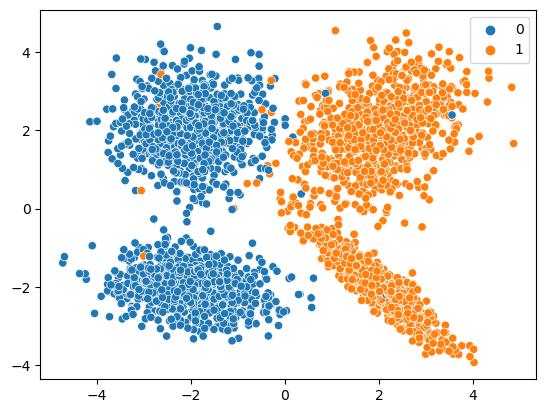

In [3]:
sns.scatterplot(x = x[:,0],y=x[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1, stratify=y)

X_trainf, X_cv, y_trainf, y_cv = train_test_split(X_train, y_train, test_size=0.1,random_state=1, stratify=y_train)


In [5]:
std = StandardScaler()

X_trainf = std.fit_transform(X_trainf)

X_cv = std.transform(X_cv)

X_test = std.transform(X_test)

X_train = std.transform(X_train)

### Tuning Of Activation Function**

In [35]:
#Keras tuner

!pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import keras_tuner as kt

#Frist we need to create a user define function, use parameter as hp, it will return model
#hp will have first method called choice(), means whenever we are having hyperparameter, take descrete amount of data.
#hp will have second method called int(), means whenever a hypermeter choose a value from integer number of point.
#hp will have third method called float()
#Second we will find best activation function

In [71]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    model.add(Dense(units=5, activation=hp.Choice('hl1', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=3, activation=hp.Choice('hl2 ', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer='sgd', loss ='binary_crossentropy', metrics=['accuracy'])
    return model

In [72]:
rand_ser = kt.RandomSearch(models, objective='val_loss', max_trials= 9, max_retries_per_trial=2, directory=r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning")

#models--function name
#Objective = val_loss--means which ever model having minimum val loss give me that model
#max_train--means how many number of time we have to call the models, we have to give combination value we are having 3 act func and hidden layer are 2 to it will be 9 combination.
#max_retries_per_trial--means how many number of time each model will call itself

Reloading Tuner from E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\untitled_project\tuner0.json


In [73]:
rand_ser.search(X_train, y_train,epochs=5, validation_data = (X_cv,y_cv))

#Training

In [74]:
rand_ser.get_best_hyperparameters()[0].values

#Best hyperparameters in each layers

{'hl1': 'tanh', 'hl2 ': 'tanh'}

In [78]:
rand_ser.search_space_summary()

#Search space summary\configuration

Search space summary
Default search space size: 2
hl1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
hl2  (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}


In [79]:
rand_ser.results_summary()

#resulted summary, based on minimum val_loss

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
hl1: tanh
hl2 : tanh
Score: 0.21850092709064484

Trial 6 summary
Hyperparameters:
hl1: relu
hl2 : tanh
Score: 0.2653084397315979

Trial 8 summary
Hyperparameters:
hl1: relu
hl2 : relu
Score: 0.2999766170978546

Trial 1 summary
Hyperparameters:
hl1: tanh
hl2 : relu
Score: 0.33375462889671326

Trial 3 summary
Hyperparameters:
hl1: sigmoid
hl2 : relu
Score: 0.3779456913471222

Trial 4 summary
Hyperparameters:
hl1: tanh
hl2 : sigmoid
Score: 0.4345768392086029

Trial 5 summary
Hyperparameters:
hl1: relu
hl2 : sigmoid
Score: 0.4947110712528229

Trial 7 summary
Hyperparameters:
hl1: sigmoid
hl2 : tanh
Score: 0.5701176524162292

Trial 0 summary
Hyperparameters:
hl1: sigmoid
hl2 : sigmoid
Score: 0.6981915235519409


In [75]:
final_model = rand_ser.get_best_models(num_models=1)[0]

final_model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
final_model.compile(optimizer='sgd', loss ='binary_crossentropy', metrics=['accuracy'])

In [77]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10, initial_epoch=6)

#initial_epoch = 6 becz we have trained this model for 5 epochs before

Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.9852 - loss: 0.1890
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9839 - loss: 0.1337
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9840 - loss: 0.1070
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9870 - loss: 0.0855
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9883 - loss: 0.0764
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9891 - loss: 0.0723
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9819 - loss: 0.0720
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9824 - loss: 0.0737
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9864 - loss: 0.0633
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9833 - loss: 0.0672
Epoch 17/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9834 - loss: 0.0687
Epoch 18/20
270/270 ━━━━━━━━

### Tuning of Activation function and Optimizer

In [83]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    model.add(Dense(units=5, activation=hp.Choice('hl1', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=3, activation=hp.Choice('hl2 ', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

In [84]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=27, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='activoptimiz')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

In [85]:
rand.search(X_train, y_train, epochs=5, validation_data=(X_cv, y_cv))

Trial 24 Complete [00h 00m 07s]
val_loss: 0.7127766013145447

Best val_loss So Far: 0.1999586522579193
Total elapsed time: 00h 03m 23s


In [86]:
rand.get_best_hyperparameters()[0].values

{'hl1': 'relu', 'hl2 ': 'tanh', 'opti': 'adam'}

In [87]:
rand.search_space_summary()

Search space summary
Default search space size: 3
hl1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
hl2  (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
opti (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adagrad', 'adadelta'], 'ordered': False}


In [88]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\activoptimiz
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 14 summary
Hyperparameters:
hl1: relu
hl2 : tanh
opti: adam
Score: 0.1999586522579193

Trial 15 summary
Hyperparameters:
hl1: tanh
hl2 : tanh
opti: adam
Score: 0.21776048839092255

Trial 20 summary
Hyperparameters:
hl1: tanh
hl2 : relu
opti: adam
Score: 0.344054251909256

Trial 16 summary
Hyperparameters:
hl1: relu
hl2 : relu
opti: adam
Score: 0.3561815917491913

Trial 02 summary
Hyperparameters:
hl1: sigmoid
hl2 : tanh
opti: adam
Score: 0.38022011518478394

Trial 07 summary
Hyperparameters:
hl1: tanh
hl2 : sigmoid
opti: adam
Score: 0.43391895294189453

Trial 22 summary
Hyperparameters:
hl1: relu
hl2 : tanh
opti: adagrad
Score: 0.4538947343826294

Trial 05 summary
Hyperparameters:
hl1: sigmoid
hl2 : relu
opti: adam
Score: 0.4572819769382477

Trial 21 summary
Hyperparameters:
hl1: tanh
hl2 : tanh
opti: 

In [89]:
final_model = rand.get_best_models(num_models=1)[0]

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [90]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [92]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=6)

Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.1197
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9877 - loss: 0.0776
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0742
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.0762
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss: 0.0484
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0520
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0627
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0491
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0446
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0735
Epoch 17/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9879 - loss: 0.0572
Epoch 18/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

### Tuning of Activation Function, Optimizer and Number of Neurons

In [93]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    model.add(Dense(units=hp.Int("hl1_neuron",3,50), activation=hp.Choice('hl1', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=hp.Int("hl2_neuron",3,50), activation=hp.Choice('hl2 ', ['sigmoid','tanh','relu'])))
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

#hp.Int("hl",3,50)--means starting number of neron and end number, we can also give step by giving ,becz we are dealing with numbers we have to use hp.Int
#becz we are using randomsearch it will choose random neurons between 3-50

In [94]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=10, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='acti_optimiz_neuron')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [95]:
rand.search(X_train, y_train, epochs=5, validation_data=(X_cv, y_cv))

Trial 10 Complete [00h 00m 08s]
val_loss: 0.13801708817481995

Best val_loss So Far: 0.13801708817481995
Total elapsed time: 00h 01m 26s


In [96]:
rand.get_best_hyperparameters()[0].values

{'hl1_neuron': 20,
 'hl1': 'relu',
 'hl2_neuron': 28,
 'hl2 ': 'tanh',
 'opti': 'adam'}

In [97]:
rand.search_space_summary()

Search space summary
Default search space size: 5
hl1_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
hl2_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl2  (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
opti (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adagrad', 'adadelta'], 'ordered': False}


In [98]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 09 summary
Hyperparameters:
hl1_neuron: 20
hl1: relu
hl2_neuron: 28
hl2 : tanh
opti: adam
Score: 0.13801708817481995

Trial 04 summary
Hyperparameters:
hl1_neuron: 14
hl1: sigmoid
hl2_neuron: 41
hl2 : relu
opti: adam
Score: 0.14235423505306244

Trial 03 summary
Hyperparameters:
hl1_neuron: 48
hl1: relu
hl2_neuron: 11
hl2 : sigmoid
opti: adam
Score: 0.15296195447444916

Trial 02 summary
Hyperparameters:
hl1_neuron: 44
hl1: relu
hl2_neuron: 30
hl2 : tanh
opti: adagrad
Score: 0.46052175760269165

Trial 01 summary
Hyperparameters:
hl1_neuron: 28
hl1: tanh
hl2_neuron: 24
hl2 : tanh
opti: adadelta
Score: 0.5919728875160217

Trial 07 summary
Hyperparameters:
hl1_neuron: 32
hl1: sigmoid
hl2_neuron: 50
hl2 : relu
opti: adadelta
Score: 0.7159860730171204

Trial 08 summary
Hyperparameters:
hl1_neuron: 27
h

In [99]:
final_model = rand.get_best_models(num_models=1)[0]

C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [100]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              29 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677 (2.64 KB)

 Trainable params: 677 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [102]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=6)

Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0612
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0566
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0496
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0589
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0546
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0595
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.0532
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0636
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0514
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0512
Epoch 17/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0579
Epoch 18/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

### Tuning of Activation Function, Optimizer, Number of Neurons, Weight initializer

In [115]:
def models(hp):
    model = Sequential()
    
    model.add(InputLayer(input_shape=(2,)))
    model.add(Dense(units=hp.Int("hl1_neuron",3,50), activation=hp.Choice('hl1', ['sigmoid','tanh','relu']),kernel_initializer= hp.Choice('initializerhl1',['RandomNormal', 'GlorotNormal', 'GlorotUniform'])))
    model.add(Dense(units=hp.Int("hl2_neuron",3,50), activation=hp.Choice('hl2', ['sigmoid','tanh','relu']),kernel_initializer= hp.Choice('initializerhl2',['RandomNormal', 'GlorotNormal', 'GlorotUniform'])))
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

#hp.Int("hl",3,50)--means starting number of neron and end number, we can also give step by giving ,becz we are dealing with numbers we have to use hp.Int
#becz we are using randomsearch it will choose random neurons between 3-50

In [116]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=10, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='acti_optimiz_neuron_wtini_neww')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

In [117]:
rand.search(X_train, y_train, epochs=5, validation_data=(X_cv, y_cv))

Trial 10 Complete [00h 00m 03s]
val_loss: 0.4292455017566681

Best val_loss So Far: 0.13780243694782257
Total elapsed time: 00h 00m 53s


In [118]:
rand.get_best_hyperparameters()[0].values

{'hl1_neuron': 26,
 'hl1': 'tanh',
 'initializerhl1': 'GlorotUniform',
 'hl2_neuron': 30,
 'hl2': 'relu',
 'initializerhl2': 'RandomNormal',
 'opti': 'adam'}

In [119]:
rand.search_space_summary()

Search space summary
Default search space size: 7
hl1_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl1 (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
hl2_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl2 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl2 (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
opti (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adagrad', 'adadelta'], 'ordered': False}


In [120]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron_wtini_neww
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 02 summary
Hyperparameters:
hl1_neuron: 26
hl1: tanh
initializerhl1: GlorotUniform
hl2_neuron: 30
hl2: relu
initializerhl2: RandomNormal
opti: adam
Score: 0.13780243694782257

Trial 05 summary
Hyperparameters:
hl1_neuron: 47
hl1: tanh
initializerhl1: RandomNormal
hl2_neuron: 37
hl2: sigmoid
initializerhl2: GlorotUniform
opti: adam
Score: 0.14001834392547607

Trial 06 summary
Hyperparameters:
hl1_neuron: 38
hl1: tanh
initializerhl1: RandomNormal
hl2_neuron: 24
hl2: sigmoid
initializerhl2: RandomNormal
opti: adam
Score: 0.14100652933120728

Trial 08 summary
Hyperparameters:
hl1_neuron: 28
hl1: sigmoid
initializerhl1: GlorotNormal
hl2_neuron: 20
hl2: relu
initializerhl2: GlorotUniform
opti: adam
Score: 0.14463622868061066

Trial 00 summary
Hyperparameters:
hl1_neuron: 6
hl1: tanh
initial

In [121]:
final_model = rand_ser.get_best_models(num_models=1)[0]

final_model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [123]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=6)

Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9813 - loss: 0.1801
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0909
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0756
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0697
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0650
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0584
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0618
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0598
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0624
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0502
Epoch 17/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0650
Epoch 18/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

### Tuning of Activation Function, Optimizer, Number of Neurons, Weight initializer and Dropout_rate

In [130]:
def models(hp):
    model = Sequential()
    
    model.add(InputLayer(input_shape=(2,)))
    model.add(Dense(units=hp.Int("hl1_neuron",3,50), activation=hp.Choice('hl1', ['sigmoid','tanh','relu']),kernel_initializer= hp.Choice('initializerhl1',['RandomNormal', 'GlorotNormal', 'GlorotUniform'])))
    model.add(Dropout(rate=hp.Float('drop_1',0,1)))
    
    model.add(Dense(units=hp.Int("hl2_neuron",3,50), activation=hp.Choice('hl2', ['sigmoid','tanh','relu']),kernel_initializer= hp.Choice('initializerhl2',['RandomNormal', 'GlorotNormal', 'GlorotUniform'])))
    model.add(Dropout(rate=hp.Float('drop_2',0,1)))
    
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

#hp.Int("hl",3,50)--means starting number of neron and end number, we can also give step by giving ,becz we are dealing with numbers we have to use hp.Int
#becz we are using randomsearch it will choose random neurons between 3-50

In [131]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=10, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='acti_optimiz_neuron_wtini_dropout')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

Reloading Tuner from E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron_wtini_dropout\tuner0.json


In [132]:
rand.search(X_train, y_train, epochs=5, validation_data=(X_cv, y_cv))

In [133]:
rand.get_best_hyperparameters()[0].values

{'hl1_neuron': 6,
 'hl1': 'relu',
 'initializerhl1': 'GlorotUniform',
 'drop': 0.5234522152774029,
 'hl2_neuron': 49,
 'hl2': 'sigmoid',
 'initializerhl2': 'GlorotNormal',
 'opti': 'adam'}

In [134]:
rand.search_space_summary()

Search space summary
Default search space size: 8
hl1_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl1 (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
drop (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 1.0, 'step': None, 'sampling': 'linear'}
hl2_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl2 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl2 (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
opti (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', '

In [135]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron_wtini_dropout
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
hl1_neuron: 6
hl1: relu
initializerhl1: GlorotUniform
drop: 0.5234522152774029
hl2_neuron: 49
hl2: sigmoid
initializerhl2: GlorotNormal
opti: adam
Score: 0.20339392125606537

Trial 08 summary
Hyperparameters:
hl1_neuron: 10
hl1: relu
initializerhl1: RandomNormal
drop: 0.7408619368274774
hl2_neuron: 4
hl2: tanh
initializerhl2: RandomNormal
opti: adam
Score: 0.2330654412508011

Trial 00 summary
Hyperparameters:
hl1_neuron: 31
hl1: sigmoid
initializerhl1: GlorotNormal
drop: 0.6075091147446843
hl2_neuron: 21
hl2: relu
initializerhl2: GlorotNormal
opti: adam
Score: 0.4840022921562195

Trial 03 summary
Hyperparameters:
hl1_neuron: 34
hl1: tanh
initializerhl1: GlorotUniform
drop: 0.46954743669908205
hl2_neuron: 17
hl2: tanh
initializerhl2: GlorotUniform
opti: a

In [136]:
final_model = rand.get_best_models(num_models=1)[0]

C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [137]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 49)                  │             343 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [139]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=6)

Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9856 - loss: 0.1177
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0591
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0575
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0607
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0630
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9862 - loss: 0.0659
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0629
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0629
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9860 - loss: 0.0637
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0477
Epoch 17/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0475
Epoch 18/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

### Tuning for No of hidden Layers

In [43]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    
    for i in range(hp.Int("hidden_layer",3,20)):
        model.add(Dense(units = hp.Int("hl{}_neuron".format(i),3,50),activation=hp.Choice('hl{}_a'.format(i), ['sigmoid','tanh','relu'])))
    
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

#hp.Int("hl",3,50)--means starting number of neron and end number, we can also give step by giving ,becz we are dealing with numbers we have to use hp.Int
#becz we are using randomsearch it will choose random neurons between 3-50
#hidden_layer,3,20, It will randomly choose a number, that will be number of hidden layers

In [44]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=10, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='acti_optimiz_neuron_hl111')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

In [45]:
rand.search(X_train, y_train, epochs=3, validation_data=(X_cv, y_cv))

Trial 10 Complete [00h 00m 08s]
val_loss: 0.18038146197795868

Best val_loss So Far: 0.13977839052677155
Total elapsed time: 00h 00m 58s


In [46]:
rand.get_best_hyperparameters()[0].values

{'hidden_layer': 3,
 'hl0_neuron': 50,
 'hl0_a': 'relu',
 'hl1_neuron': 20,
 'hl1_a': 'sigmoid',
 'hl2_neuron': 9,
 'hl2_a': 'tanh',
 'opti': 'adam',
 'hl3_neuron': 26,
 'hl3_a': 'tanh',
 'hl4_neuron': 36,
 'hl4_a': 'sigmoid',
 'hl5_neuron': 21,
 'hl5_a': 'tanh',
 'hl6_neuron': 29,
 'hl6_a': 'tanh',
 'hl7_neuron': 12,
 'hl7_a': 'tanh',
 'hl8_neuron': 46,
 'hl8_a': 'tanh',
 'hl9_neuron': 20,
 'hl9_a': 'sigmoid',
 'hl10_neuron': 5,
 'hl10_a': 'sigmoid',
 'hl11_neuron': 38,
 'hl11_a': 'tanh',
 'hl12_neuron': 42,
 'hl12_a': 'tanh',
 'hl13_neuron': 31,
 'hl13_a': 'sigmoid',
 'hl14_neuron': 37,
 'hl14_a': 'sigmoid',
 'hl15_neuron': 47,
 'hl15_a': 'tanh',
 'hl16_neuron': 45,
 'hl16_a': 'relu',
 'hl17_neuron': 28,
 'hl17_a': 'tanh',
 'hl18_neuron': 7,
 'hl18_a': 'tanh',
 'hl19_neuron': 17,
 'hl19_a': 'tanh'}

**here it is choosing randomly 10 hidden layers and giving random neurons and activation function**

In [47]:
rand.search_space_summary()

Search space summary
Default search space size: 42
hidden_layer (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
hl0_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl0_a (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
hl1_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl1_a (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
hl2_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl2_a (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
opti (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adagrad', 'adadelta'], 'ordered': False}
hl3_neuron (Int)
{'

In [48]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron_hl111
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
hidden_layer: 3
hl0_neuron: 50
hl0_a: relu
hl1_neuron: 20
hl1_a: sigmoid
hl2_neuron: 9
hl2_a: tanh
opti: adam
hl3_neuron: 26
hl3_a: tanh
hl4_neuron: 36
hl4_a: sigmoid
hl5_neuron: 21
hl5_a: tanh
hl6_neuron: 29
hl6_a: tanh
hl7_neuron: 12
hl7_a: tanh
hl8_neuron: 46
hl8_a: tanh
hl9_neuron: 20
hl9_a: sigmoid
hl10_neuron: 5
hl10_a: sigmoid
hl11_neuron: 38
hl11_a: tanh
hl12_neuron: 42
hl12_a: tanh
hl13_neuron: 31
hl13_a: sigmoid
hl14_neuron: 37
hl14_a: sigmoid
hl15_neuron: 47
hl15_a: tanh
hl16_neuron: 45
hl16_a: relu
hl17_neuron: 28
hl17_a: tanh
hl18_neuron: 7
hl18_a: tanh
hl19_neuron: 17
hl19_a: tanh
Score: 0.13977839052677155

Trial 09 summary
Hyperparameters:
hidden_layer: 17
hl0_neuron: 3
hl0_a: tanh
hl1_neuron: 22
hl1_a: sigmoid
hl2_neuron: 4
hl2_a: tanh
opti: ada

In [49]:
final_model = rand.get_best_models(num_models=1)[0]

C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [50]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             189 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,369 (5.35 KB)

 Trainable params: 1,369 (5.35 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [52]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=4)

Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0592
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0604
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9906 - loss: 0.0541
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9867 - loss: 0.0587
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0496
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0557
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0534
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9879 - loss: 0.0602
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9916 - loss: 0.0407
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0557
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9903 - loss: 0.0457
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [ ]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    
    for i in range(hp.Int("hidden_layer",3,20)):
        model.add(Dense(units = hp.Int("hl{}_neuron".format(i),3,50),activation=hp.Choice('hl{}_a'.format(i), ['sigmoid','tanh','relu'])))
    
    model.add(Dense(units=1, activation='sigmoid'))
    
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

#hp.Int("hl",3,50)--means starting number of neron and end number, we can also give step by giving ,becz we are dealing with numbers we have to use hp.Int
#becz we are using randomsearch it will choose random neurons between 3-50
#hidden_layer,3,20, It will randomly choose a number, that will be number of hidden layers

In [58]:
def models(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(2,)))
    
    for i in range(hp.Int('hidden_layer',3,20)):
        model.add(Dense(units=hp.Int('hl{}_neuron'.format(i),3,50),
                        activation=hp.Choice('hl{}_a'.format(i),['sigmoid','tanh','relu']),
                        kernel_initializer= hp.Choice('initializerhl{}_b'.format(i),['RandomNormal', 'GlorotNormal', 'GlorotUniform'])))
        
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer= hp.Choice('opti',['adam','adagrad','adadelta']), loss ='binary_crossentropy', metrics=['accuracy'])
    return model

In [59]:
rand = kt.RandomSearch(models, objective='val_loss',max_trials=10, directory = r"E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning",project_name='acti_optimiz_neuron_hl11123')

#project_name == inside hyperparaer tuning folder, it will create another folder with prvided name

In [60]:
rand.search(X_train, y_train, epochs=3, validation_data=(X_cv, y_cv))

Trial 10 Complete [00h 00m 08s]
val_loss: 0.17279599606990814

Best val_loss So Far: 0.14613142609596252
Total elapsed time: 00h 01m 28s


In [61]:
rand.get_best_hyperparameters()[0].values

{'hidden_layer': 6,
 'hl0_neuron': 14,
 'hl0_a': 'sigmoid',
 'initializerhl0_b': 'RandomNormal',
 'hl1_neuron': 15,
 'hl1_a': 'relu',
 'initializerhl1_b': 'GlorotUniform',
 'hl2_neuron': 19,
 'hl2_a': 'tanh',
 'initializerhl2_b': 'RandomNormal',
 'opti': 'adam',
 'hl3_neuron': 14,
 'hl3_a': 'tanh',
 'initializerhl3_b': 'GlorotNormal',
 'hl4_neuron': 29,
 'hl4_a': 'tanh',
 'initializerhl4_b': 'RandomNormal',
 'hl5_neuron': 46,
 'hl5_a': 'sigmoid',
 'initializerhl5_b': 'GlorotNormal',
 'hl6_neuron': 34,
 'hl6_a': 'sigmoid',
 'initializerhl6_b': 'GlorotNormal',
 'hl7_neuron': 21,
 'hl7_a': 'sigmoid',
 'initializerhl7_b': 'RandomNormal',
 'hl8_neuron': 14,
 'hl8_a': 'tanh',
 'initializerhl8_b': 'RandomNormal',
 'hl9_neuron': 17,
 'hl9_a': 'tanh',
 'initializerhl9_b': 'RandomNormal',
 'hl10_neuron': 32,
 'hl10_a': 'tanh',
 'initializerhl10_b': 'RandomNormal',
 'hl11_neuron': 18,
 'hl11_a': 'tanh',
 'initializerhl11_b': 'RandomNormal',
 'hl12_neuron': 49,
 'hl12_a': 'tanh',
 'initializerhl12

In [62]:
rand.search_space_summary()

Search space summary
Default search space size: 62
hidden_layer (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
hl0_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl0_a (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl0_b (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
hl1_neuron (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
hl1_a (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
initializerhl1_b (Choice)
{'default': 'RandomNormal', 'conditions': [], 'values': ['RandomNormal', 'GlorotNormal', 'GlorotUniform'], 'ordered': False}
hl2_neuron (Int)
{'default': None, 'conditions': [], 'min_valu

In [63]:
rand.results_summary()

Results summary
Results in E:\#Data Science Innomatics\Module 7 Deep Learning\Hyperparameter Tuning\acti_optimiz_neuron_hl11123
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 05 summary
Hyperparameters:
hidden_layer: 6
hl0_neuron: 14
hl0_a: sigmoid
initializerhl0_b: RandomNormal
hl1_neuron: 15
hl1_a: relu
initializerhl1_b: GlorotUniform
hl2_neuron: 19
hl2_a: tanh
initializerhl2_b: RandomNormal
opti: adam
hl3_neuron: 14
hl3_a: tanh
initializerhl3_b: GlorotNormal
hl4_neuron: 29
hl4_a: tanh
initializerhl4_b: RandomNormal
hl5_neuron: 46
hl5_a: sigmoid
initializerhl5_b: GlorotNormal
hl6_neuron: 34
hl6_a: sigmoid
initializerhl6_b: GlorotNormal
hl7_neuron: 21
hl7_a: sigmoid
initializerhl7_b: RandomNormal
hl8_neuron: 14
hl8_a: tanh
initializerhl8_b: RandomNormal
hl9_neuron: 17
hl9_a: tanh
initializerhl9_b: RandomNormal
hl10_neuron: 32
hl10_a: tanh
initializerhl10_b: RandomNormal
hl11_neuron: 18
hl11_a: tanh
initializerhl11_b: RandomNormal
hl12_neuron: 49
hl12_a: tanh

In [64]:
final_model = rand.get_best_models(num_models=1)[0]

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [65]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 29)                  │             435 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 46)                  │           1,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              47 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,713 (10.60 KB)

 Trainable params: 2,713 (10.60 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
final_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [67]:
final_model.fit(X_train, y_train, epochs=20, batch_size=10,initial_epoch=4)

Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0792
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0688
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.0639
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9858 - loss: 0.0563
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0542
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.0567
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0455
Epoch 12/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9856 - loss: 0.0623
Epoch 13/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0684
Epoch 14/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0591
Epoch 15/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9842 - loss: 0.0600
Epoch 16/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/